**UNIVERSIDADE DE SÃO PAULO**<br>
**MBA DATA SCIENCE & ANALYTICS USP/ESALQ**<br>
**SUPERVISED MACHINE LEARNING: EXERCÍCIOS ADICIONAIS**<br>
**Prof. Dr. Wilson Tarantim Junior**<br>
Aluna: Luiza Batista Laquini<br>
Turma: DSA 241<br>


*coding: utf-8*

In [24]:
#%% Instalando os pacotes necessários

# !pip install pandas
# !pip install numpy
# !pip install statsmodels
# !pip install matplotlib
# !pip install -U seaborn
# !pip install pingouin
# !pip install statstests
# !pip install scipy

In [25]:
#%% Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
from statstests.process import stepwise
from statstests.tests import shapiro_francia
from scipy.stats import boxcox
from scipy.stats import norm
from scipy import stats

In [26]:
#%% Importando o banco de dados

dados = pd.read_excel('data/preço_casas.xlsx')
## Fonte: adaptado de https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

dados.head(3)

,preco,area_sqm,quartos,banheiros,rua_principal,quarto_hospedes,porao,aquecimento_agua,ar_condicionado,vagas_garagem,local_pref,mobilia
0,1330000,689,4,2,sim,não,não,não,sim,2,sim,mobiliado
1,1225000,832,4,4,sim,não,não,não,sim,3,não,mobiliado
2,1225000,925,3,2,sim,não,sim,não,não,2,sim,mobilia_parcial


In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   preco             545 non-null    int64 
 1   area_sqm          545 non-null    int64 
 2   quartos           545 non-null    int64 
 3   banheiros         545 non-null    int64 
 4   rua_principal     545 non-null    object
 5   quarto_hospedes   545 non-null    object
 6   porao             545 non-null    object
 7   aquecimento_agua  545 non-null    object
 8   ar_condicionado   545 non-null    object
 9   vagas_garagem     545 non-null    int64 
 10  local_pref        545 non-null    object
 11  mobilia           545 non-null    object
dtypes: int64(5), object(7)
memory usage: 51.2+ KB


In [28]:
#%% Estatísticas descritivas dos dados

print(dados[['preco', 'area_sqm', 'quartos', 'banheiros', 'vagas_garagem']].describe(), '\n')

print(dados['rua_principal'].value_counts().sort_index(), '\n')
print(dados['quarto_hospedes'].value_counts().sort_index(), '\n')
print(dados['porao'].value_counts().sort_index(), '\n')
print(dados['aquecimento_agua'].value_counts().sort_index(), '\n')
print(dados['ar_condicionado'].value_counts().sort_index(), '\n')
print(dados['local_pref'].value_counts().sort_index(), '\n')
print(dados['mobilia'].value_counts().sort_index(), '\n')

              preco    area_sqm     quartos   banheiros  vagas_garagem
count  5.450000e+02   545.00000  545.000000  545.000000     545.000000
mean   4.766729e+05   478.46055    2.965138    1.286239       0.693578
std    1.870440e+05   201.59249    0.738064    0.502470       0.861586
min    1.750000e+05   153.00000    1.000000    1.000000       0.000000
25%    3.430000e+05   334.00000    2.000000    1.000000       0.000000
50%    4.340000e+05   427.00000    3.000000    1.000000       0.000000
75%    5.740000e+05   591.00000    3.000000    2.000000       1.000000
max    1.330000e+06  1505.00000    6.000000    4.000000       3.000000 

rua_principal
não     77
sim    468
Name: count, dtype: int64 

quarto_hospedes
não    448
sim     97
Name: count, dtype: int64 

porao
não    354
sim    191
Name: count, dtype: int64 

aquecimento_agua
não    520
sim     25
Name: count, dtype: int64 

ar_condicionado
não    373
sim    172
Name: count, dtype: int64 

local_pref
não    417
sim    128
Name: c

In [29]:
#%% Análise do coeficiente de correlação de Pearson entre as variáveis

# pg.rcorr(dados[['preco', 'area_sqm', 'quartos', 'banheiros', 'vagas_garagem']],
#          method = 'pearson', upper = 'pval', 
#          decimals = 4, 
#          pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

In [30]:
#%% Obtendo as dummies de variáveis categóricas

dados = pd.get_dummies(dados,
                       columns = ['rua_principal',
                                  'quarto_hospedes',
                                  'porao',
                                  'aquecimento_agua',
                                  'ar_condicionado',
                                  'local_pref',
                                  'mobilia'],
                       dtype = int,
                       drop_first = True)

In [35]:
#%% Análise do coeficiente de correlação de Pearson entre as variáveis

rcorr = pg.rcorr(dados,
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
rcorr

,preco,area_sqm,quartos,banheiros,vagas_garagem,rua_principal_sim,quarto_hospedes_sim,porao_sim,aquecimento_agua_sim,ar_condicionado_sim,local_pref_sim,mobilia_mobiliado,mobilia_sem_mobilia
preco,-,***,***,***,***,***,***,***,**,***,***,***,***
area_sqm,0.5359,-,***,***,***,***,***,,,***,***,***,***
quartos,0.3665,0.1518,-,***,***,,*,**,,***,*,*,***
banheiros,0.5175,0.1937,0.3739,-,***,,***,**,,***,,**,***
vagas_garagem,0.3844,0.353,0.1393,0.1775,-,***,,,,***,**,***,***
rua_principal_sim,0.2969,0.2888,-0.012,0.0424,0.2044,-,**,,,**,***,***,***
quarto_hospedes_sim,0.2555,0.1403,0.0805,0.1265,0.0375,0.0923,-,***,,***,***,**,**
porao_sim,0.1871,0.0475,0.0973,0.1021,0.0515,0.044,0.3721,-,,,***,,***
aquecimento_agua_sim,0.0931,-0.0093,0.046,0.0672,0.0679,-0.0118,-0.0103,0.0044,-,***,,,
ar_condicionado_sim,0.453,0.2224,0.1606,0.1869,0.1592,0.1054,0.1382,0.0473,-0.13,-,***,***,**


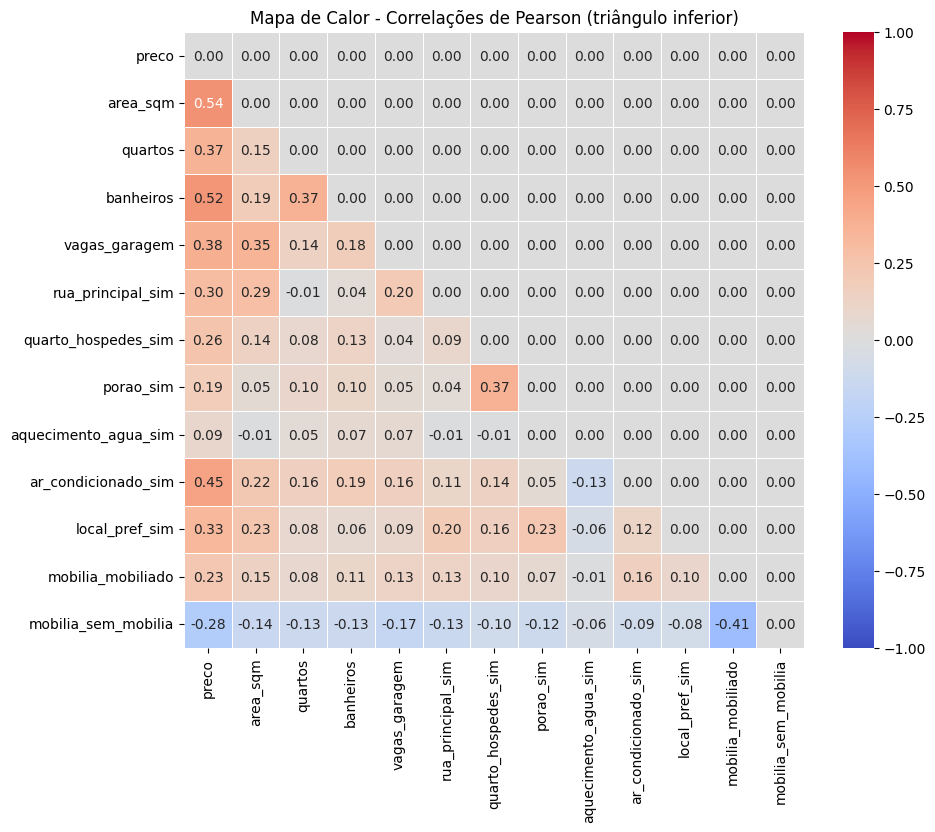

In [37]:
# Substituir os valores nulos por 0
rcorr.replace('-', 0, inplace=True)
rcorr.replace('*', 0, inplace=True)
rcorr.replace('**', 0, inplace=True)
rcorr.replace('***', 0, inplace=True)
rcorr.replace('', 0, inplace=True)

# Converter para float, caso necessário
rcorr = rcorr.astype(float)

# Criar um mapa de calor usando a matriz de correlações ajustada
plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura
sns.heatmap(rcorr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")

# Exibir o mapa de calor
plt.title('Mapa de Calor - Correlações de Pearson (triângulo inferior)')
plt.show()

In [38]:
#%% Modelo de Regressão Linear Múltipla (MQO)

# Estimação do modelo
reg = sm.OLS.from_formula(formula = 'preco ~ area_sqm + quartos + banheiros + \
                                     rua_principal_sim + quarto_hospedes_sim + \
                                     porao_sim + aquecimento_agua_sim + \
                                     ar_condicionado_sim + vagas_garagem + \
                                     local_pref_sim + mobilia_mobiliado + \
                                     mobilia_sem_mobilia',
                          data=dados).fit()

# Obtenção dos outputs
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     83.14
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          1.37e-113
Time:                        14:36:16   Log-Likelihood:                -7100.8
No. Observations:                 545   AIC:                         1.423e+04
Df Residuals:                     532   BIC:                         1.428e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5114.4326 

Necessário verificar:<br>
- Aderência dos resíduos à normalidade (Teste de Shapiro-Francia)
- Multicolinearidade (procedimento stepwise)
- Heterocedasticidade (Teste de Breusch Pagan)

In [41]:
#%% Teste de verificação da aderência dos resíduos à normalidade

# Elaboração do teste de Shapiro-Francia
teste_sf = shapiro_francia(reg.resid)
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
alpha = 0.05

if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade - o modelo é linear')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade - o modelo não é linear')

method  :  Shapiro-Francia normality test
statistics W  :  0.961728966158495
statistics z  :  5.960073338775533
p-value  :  1.2606237779414531e-09
Rejeita-se H0 - Distribuição não aderente à normalidade - o modelo não é linear


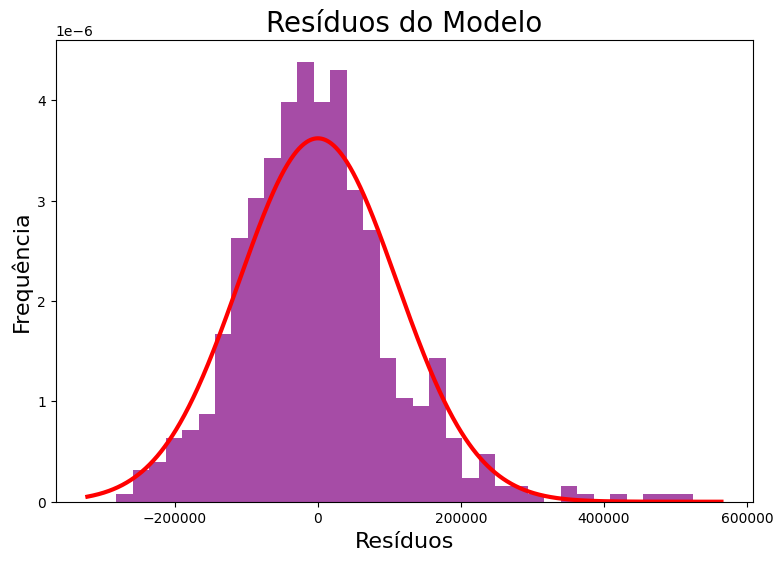

In [43]:
#%% Histograma dos resíduos do modelo OLS

# Parâmetros de referência para a distribuição normal teórica
(mu, std) = norm.fit(reg.resid)

# Criação do gráfico
plt.figure(figsize=(9,6))
plt.hist(reg.resid, bins=35, density=True, alpha=0.7, color='purple')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=3, color='red')
plt.title('Resíduos do Modelo', fontsize=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()


In [44]:
#%% Realizando a transformação de Box-Cox na variável dependente

y_box, lmbda = boxcox(dados['preco'])

# Valor obtido para o lambda
print(lmbda)

# Adicionando ao banco de dados
dados['preco_bc'] = y_box

-0.13464665227644163


In [47]:
#%% Modelo de regressão com transformação de Box-Cox em Y

# Estimação do modelo
reg_bc = sm.OLS.from_formula(formula = 'preco_bc ~ area_sqm + quartos + banheiros + \
                                        rua_principal_sim + quarto_hospedes_sim + \
                                        porao_sim + aquecimento_agua_sim + \
                                        ar_condicionado_sim + vagas_garagem + \
                                        local_pref_sim + mobilia_mobiliado + \
                                        mobilia_sem_mobilia',
                             data=dados).fit()

# Obtenção dos outputs
print(reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:               preco_bc   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     88.06
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          6.35e-118
Time:                        14:53:17   Log-Likelihood:                 1019.2
No. Observations:                 545   AIC:                            -2012.
Df Residuals:                     532   BIC:                            -1957.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.9768 

In [48]:
#%% Reavaliando aderência à normalidade dos resíduos do modelo

# Elaboração do teste de Shapiro-Francia
teste_sf_bc = shapiro_francia(reg_bc.resid)
teste_sf_bc = teste_sf_bc.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf_bc #definição dos elementos da lista (tupla)
alpha = 0.05

if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade - o modelo é linear')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade - o modelo não é linear')

method  :  Shapiro-Francia normality test
statistics W  :  0.9955639443540336
statistics z  :  1.2065939442939486
p-value  :  0.11379428001876213
Não se rejeita H0 - Distribuição aderente à normalidade - o modelo é linear


In [49]:
#%% Removendo as variáveis que não apresentam significância estatística

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

# Stepwise do modelo
modelo_stepwise_bc = stepwise(reg_bc, pvalue_limit=0.05)

# Teste de Shapiro-Francia
teste_sf_step = shapiro_francia(modelo_stepwise_bc.resid)

Regression type: OLS 

Estimating model...: 
 preco_bc ~ Q('area_sqm') + Q('quartos') + Q('banheiros') + Q('rua_principal_sim') + Q('quarto_hospedes_sim') + Q('porao_sim') + Q('aquecimento_agua_sim') + Q('ar_condicionado_sim') + Q('vagas_garagem') + Q('local_pref_sim') + Q('mobilia_mobiliado') + Q('mobilia_sem_mobilia')

 Discarding atribute "Q('mobilia_mobiliado')" with p-value equal to 0.4430979728505402 

Estimating model...: 
 preco_bc ~ Q('area_sqm') + Q('quartos') + Q('banheiros') + Q('rua_principal_sim') + Q('quarto_hospedes_sim') + Q('porao_sim') + Q('aquecimento_agua_sim') + Q('ar_condicionado_sim') + Q('vagas_garagem') + Q('local_pref_sim') + Q('mobilia_sem_mobilia')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('mobilia_mobiliado')", 'p-value': 0.4430979728505402}

 Model after stepwise process...: 
 preco_bc ~ Q('area_sqm') + Q('quartos') + Q('banheiros') + Q('rua_principal_sim') + Q('quarto_hospedes_sim') + Q('

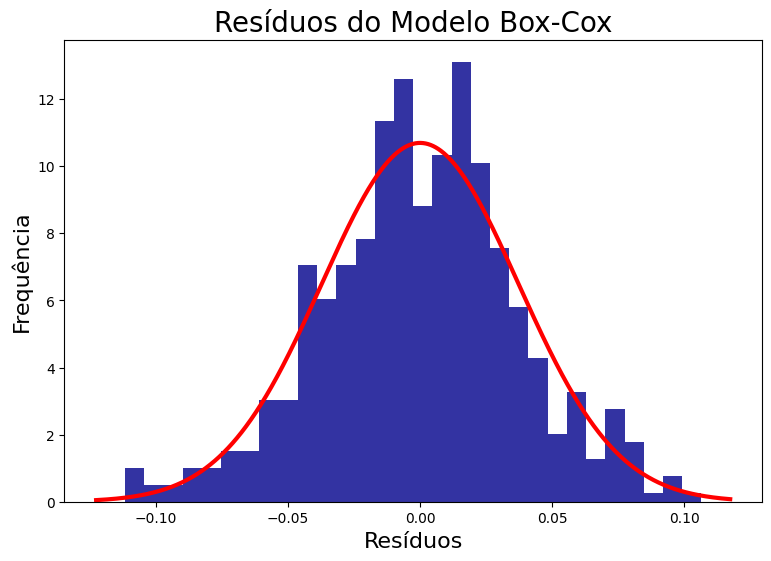

In [52]:
#%% Novo histograma dos resíduos do modelo

# Parâmetros de referência para a distribuição normal teórica
(mu_bc, std_bc) = norm.fit(modelo_stepwise_bc.resid)

# Criação do gráfico
plt.figure(figsize=(9,6))
plt.hist(modelo_stepwise_bc.resid, bins=30, density=True, alpha=0.8, color='darkblue')
xmin_bc, xmax_bc = plt.xlim()
x_bc = np.linspace(xmin_bc, xmax_bc, 1000)
p_bc = norm.pdf(x_bc, mu_bc, std_bc)
plt.plot(x_bc, p_bc, linewidth=3, color='red')
plt.title('Resíduos do Modelo Box-Cox', fontsize=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()

In [53]:
#%% Realizando predições com base no modelo estimado

# Modelo Não Linear (Box-Cox):
valor_pred_bc = modelo_stepwise_bc.predict(pd.DataFrame({'area_sqm':[350],
                                                         'quartos': [3],
                                                         'banheiros': [3],
                                                         'rua_principal_sim': [1],
                                                         'quarto_hospedes_sim': [0],
                                                         'porao_sim': [0],
                                                         'aquecimento_agua_sim': [0],
                                                         'ar_condicionado_sim': [1],
                                                         'vagas_garagem': [2],
                                                         'local_pref_sim': [0],
                                                         'mobilia_sem_mobilia': [0]}))

# Valor predito pelo modelo BC
print(f"Valor Predito (Box-Cox): {round(valor_pred_bc[0], 2)}")

Valor Predito (Box-Cox): 6.21


In [54]:
# Cálculo inverso para a obtenção do valor predito Y (preço)
valor_pred_preco = (valor_pred_bc * lmbda + 1) ** (1 / lmbda)
print(f"Valor Predito (Preço): {round(valor_pred_preco[0], 2)}")

Valor Predito (Preço): 694874.84


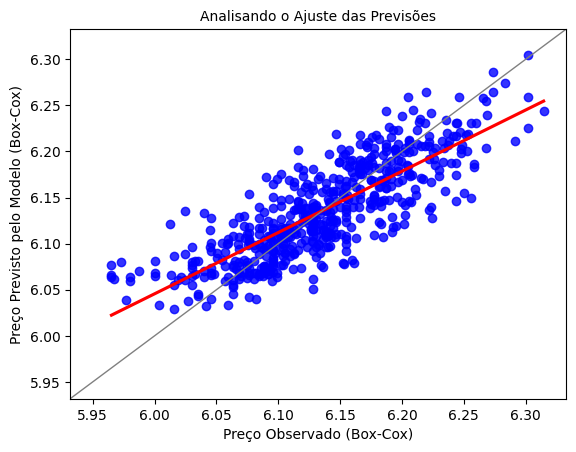

In [55]:
#%% Gráfico fitted values

# Valores preditos pelo modelo para as observações da amostra
dados['fitted_bc'] = modelo_stepwise_bc.predict()

sns.regplot(dados, x='preco_bc', y='fitted_bc', color='blue', ci=False, line_kws={'color': 'red'})
plt.title('Analisando o Ajuste das Previsões', fontsize=10)
plt.xlabel('Preço Observado (Box-Cox)', fontsize=10)
plt.ylabel('Preço Previsto pelo Modelo (Box-Cox)', fontsize=10)
plt.axline((5.95, 5.95), (max(dados['preco_bc']), max(dados['preco_bc'])), linewidth=1, color='grey')
plt.show()

In [58]:
#%% Criação da função para o teste de Breusch-Pagan (heterocedasticidade)

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value
  
#%% Aplicando a função criada para realizar o teste

teste_bp = breusch_pagan_test(modelo_stepwise_bc)

# Tomando a decisão por meio do teste de hipóteses

alpha = 0.05 # nível de significância do teste

if teste_bp[1] > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

chisq: 1.8937698023366187
p-value: 0.22493113793066632
Não se rejeita H0 - Ausência de Heterocedasticidade


In [59]:
#%% Analisando a presença de heterocedasticidade no modelo original

teste_bp_original = breusch_pagan_test(reg)

# Tomando a decisão por meio do teste de hipóteses

alpha = 0.05 # nível de significância do teste

if teste_bp_original[1] > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

#%% Fim!

chisq: 103.8677433985843
p-value: 2.183261771526693e-24
Rejeita-se H0 - Existência de Heterocedasticidade


O modelo com a transformação de Box-Cox ajustou os termos de erros heterocedásticos, indicando potencial erro da forma funcional do modelo originalmente estimado.